<a href="https://colab.research.google.com/github/seys-fing/scripts/blob/master/seys_SdeF_onda_cuadrada_exponenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representación en Serie de Fourier de una onda cuadrada
Este Notebook analiza la representación de una cuadrada periódica mediante su descomposición en Serie de Fourier.

Consideremos una señal periódica onda cuadrada de período $T$  tal que en el período $[0,T)$ vale $$x(t)=\frac{A}{2},\quad 0\leq t\leq \frac{T}{2}\mbox{, y }$$$$x(t)=-\frac{A}{2},\quad \frac{T}{2} < t< T $$

Por un lado implementamos la onda cuadrada a partir de la función *square* de la librería *scipy.signal* de Python. Los parámetros que recibe la onda cuadrada es el tiempo donde es evaluada, la frecuencia (que determina el período) y la amplitud.

In [0]:
"""

Señales y Sistemas, 2019. IIE-FIng-Udelar.
@author: Federico Lecumberry Gatón García Juan Bazerque

"""
# Importar funciones necesarias
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt


In [0]:

# =============================================================================
# Función a analizar/sintetizar.
# The square wave has a period 2*pi, has value +1 from 0 to 2*pi*duty and -1 
# from 2*pi*duty to 2*pi. duty must be in the interval [0,1].
# =============================================================================
def funcion(t, f, A=1, duty=0.5):
    return 0.5 * A * signal.square(2 * np.pi * f * t, duty)


    

## Coeficientes de la Serie de Fourier

Primero implementamos las sumas parciales de la Serie de Fourier con exponenciales complejas dada por 

$$x(t)=\sum_{k\in \mathbb Z} a_ke^{jk\frac{2\pi}{T}} $$



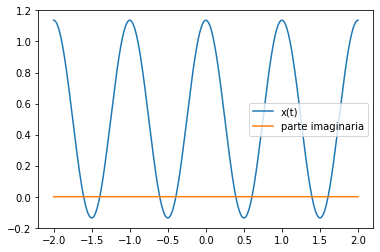

In [0]:
T=1
t = np.linspace(-2, 2, 5000)
K=2
# Suma de exponenciales. 

a0 = 0.5
z = a0


for k in range( 1, K+1 ):
    a_k=np.sin(np.pi*k/2)/(k*np.pi)
    z = z + a_k*np.exp(1j*2*np.pi*k*t/T)
    z = z + a_k*np.exp(-1j*2*np.pi*k*t/T)
plt.plot(t, np.real(z), label='x(t)')
plt.plot(t, np.imag(z), label='parte imaginaria')
    
plt.legend()



## Coeficientes de la Serie de Fourier

Ahora pasando a la forma en senos y cosenos implementamos dos funciones que retornan el valor del coeficiente $k$-ésimo de la Serie de Fourier para la onda cuadrada en la representación dada por  $$x(t) = a_0 + 2\sum_{k=1}^N B_k\cos(k\omega_0t) - C_k\sin(k\omega_0t)$$

In [0]:
# =============================================================================
# Coeficientes de la función a analizar/sintetizar.
# =============================================================================
def coeficiente_sin(k):
    mod = k % 2
    if mod > 0:
        return -1/(k * np.pi)
    else:
        return 0

def coeficiente_cos(k):
    return 0


## Programa principal

El programa principal toma tres parámetros:


1. N: Número de coeficientes de la Serie de Fourier a usar en la recosntrucción.
1. f: Frecuencia de la onda cuadrada (ver ayuda de la función [scipy.signal.square](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.square.html))
1. A: Amplitud de la onda cuadrada (ver definición de la función).

A partir de estos valores, crea un vector de tiempos donde se evalúa la función $y(t)$. Luego se implementa la Serie de Fourier sumando 2N componentes (senos y cosenos) con sus respectivos coeficientes calculados a partir de la expresión hallada en el práctico.

Se grafican cada una de las componentes que se usan en la reconstrucción. También se grafica la función original y la reconstrucción obtenida.

Coeficientes de la Serie de Fourier según la descomposición de la ec. 3.32 del libro.
B_1 = 0.000
C_1 = -0.318
B_2 = 0.000
C_2 = 0.000
B_3 = 0.000
C_3 = -0.106
B_4 = 0.000
C_4 = 0.000
B_5 = 0.000
C_5 = -0.064
B_6 = 0.000
C_6 = 0.000
B_7 = 0.000
C_7 = -0.045
B_8 = 0.000
C_8 = 0.000
B_9 = 0.000
C_9 = -0.035
B_10 = 0.000
C_10 = 0.000
B_11 = 0.000
C_11 = -0.029
B_12 = 0.000
C_12 = 0.000
B_13 = 0.000
C_13 = -0.024
B_14 = 0.000
C_14 = 0.000
B_15 = 0.000
C_15 = -0.021


Text(0.5, 1.0, 'Reconstrucción de la función con 15 coeficientes de la SdeF')

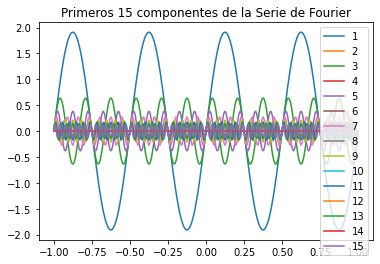

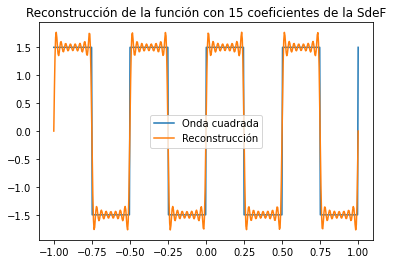

In [0]:
# =============================================================================
# Main program.
# =============================================================================
N = 15 # Número de coeficientes a usar.
f = 2 # Frecuencia de la onda cuadrada.
A = 3 # Amplitud de la onda cuadrada.

# Tiempo
n = np.linspace(-1, 1, 500)

# Tren de pulsos
y = funcion( n, f, A )

# Suma de exponenciales. 
# Ver ec.(3.32): x = a0 + 2\sum_{k=1}^N B_k\cos(k\omega_0t) - C_k\sin(k\omega_0t)
a0 = 0
z = a0

print('Coeficientes de la Serie de Fourier según la descomposición de la ec. 3.32 del libro.')
for k in range( 1, N+1 ):
    print('B_%d = %5.3f' % (k, coeficiente_cos(k)))
    print('C_%d = %5.3f' % (k, coeficiente_sin(k)))
    ecos = A * coeficiente_cos(k) * np.cos( k * (2*np.pi*f) * n )
    esin = A * coeficiente_sin(k) * np.sin( k * (2*np.pi*f) * n )
    zn = 2*( ecos - esin )
    z = z + zn
    plt.plot(n, zn, label=k)
    plt.legend()
plt.title('Primeros %d componentes de la Serie de Fourier' % N)
    
plt.figure()
plt.plot(n, y, label='Onda cuadrada')
plt.plot(n, z, label='Reconstrucción')
plt.legend()
plt.title('Reconstrucción de la función con %d coeficientes de la SdeF' % N)


# Pruebas


*   ¿Mejora la aproximación al aumentar el número de coeficientes?
*  ¿Es posible encontrar una expresión cerrada para el error cometido?
*   Podemos anticipar que el armónico fundamental corresponde a un seno.  ¿Por qué? ¿Qué sucede si cambiamos senos por cosenos? 
* Evidentemente el término $a_0$ para esta onda es  nulo. ¿Por qué? ¿Qué pasa si lo cambiamos?
